# Jupyter notebook example

Here we demonstrate how to use a Jupyter notebook that may be served locally or on a Kubernetes cluster

## Plotting using NumPy

This is a simple script to generate and plot a *sine* wave.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 10
x = np.linspace(0.0, 2.0, n)
y = np.sin(np.pi * x)

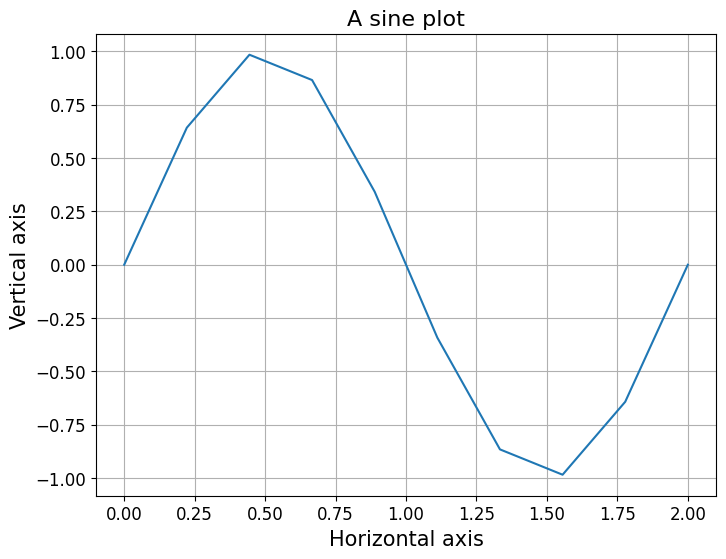

In [4]:
plt.figure(figsize = (8, 6))
plt.title("A sine plot", fontsize = 16)
plt.xlabel("Horizontal axis", fontsize = 15)
plt.ylabel("Vertical axis", fontsize = 15)
plt.plot(x, y)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid()

## Ray cluster testing

The following code tests the Ray cluster in which the JupyterLab server is running. The code runs a remote function on all the available workers, and prints their `hostname` on return. This demonstrates that the remote functions are being executed on different work units.

In [5]:
import ray
import time
import socket

if ray.is_initialized():
    ray.shutdown()
    
ray.init("auto")
#ray.init(address = "ray://mycluster-ray-head:10001")
#ray.init(address = "172.30.186.150:6379")
#ray.init(address = "172.21.103.4:8265")
#ray.init(address = "172.21.103.4:10001")

RayContext(dashboard_url='10.217.0.118:8265', python_version='3.7.7', ray_version='1.13.1', ray_commit='da2a91cd34ac58df4c49b2fa65a5bd25bc1e2057', address_info={'node_ip_address': '10.217.0.121', 'raylet_ip_address': '10.217.0.121', 'redis_address': None, 'object_store_address': '/tmp/ray/session_2022-09-26_13-38-36_182086_1/sockets/plasma_store', 'raylet_socket_name': '/tmp/ray/session_2022-09-26_13-38-36_182086_1/sockets/raylet', 'webui_url': '10.217.0.118:8265', 'session_dir': '/tmp/ray/session_2022-09-26_13-38-36_182086_1', 'metrics_export_port': 54840, 'gcs_address': 'mycluster-ray-head:6379', 'address': 'mycluster-ray-head:6379', 'node_id': '204a8ae48e6c0b1c338cd8506b2e86d4376f1fcd7ee67cc40e409cec'})

In [6]:
@ray.remote
def gethostname(worker_id):
    time.sleep(2)
    return "Worker %d: %s" % (worker_id, socket.gethostname())

In [7]:
num_workers = 8
output = ray.get([gethostname.remote(worker_id) for worker_id in range(num_workers)])
print("\n".join(output))

Worker 0: mycluster-ray-worker-68c6679546-jkhqf
Worker 1: mycluster-ray-worker-68c6679546-lp6b6
Worker 2: mycluster-ray-head-6479567bbd-s9k9k
Worker 3: mycluster-jupyterlab-58f59b7597-28n78
Worker 4: mycluster-jupyterlab-58f59b7597-28n78
Worker 5: mycluster-jupyterlab-58f59b7597-28n78
Worker 6: mycluster-jupyterlab-58f59b7597-28n78
Worker 7: mycluster-jupyterlab-58f59b7597-28n78


## Importing custome made modules

In cases a script needs to be broken into parts or some other code is needed, the respective code can be turned into a module and loaded here.

In [1]:
import mymodule

%load_ext autoreload
%autoreload 2

In [2]:
mymodule.say_hi()

Hi from 'mymodule'
